<a href="https://colab.research.google.com/github/dmandic17/medical-drug-review-analysis/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preview and analysis of useful reviews

**In this notebook, we show how the data that will be used looks like (the data is filtered using notebook01). Also, we explore some of the data properties and show them using plots.**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from tueplots import bundles

plt.rcParams.update(bundles.neurips2021(usetex=False, ncols=2, nrows=1.7))

data = pd.read_csv('../data/drugsComTrain_top_conditions.csv')
data.head()

,Unnamed: 0,uniqueID,drugName,condition,review,rating,date,usefulCount,condition_count
0,1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,3383.0
1,2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,28788.0
2,3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,28788.0
3,4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,1079.0
4,5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,561.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129376 entries, 0 to 129375
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       129376 non-null  int64  
 1   uniqueID         129376 non-null  int64  
 2   drugName         129376 non-null  object 
 3   condition        128477 non-null  object 
 4   review           129376 non-null  object 
 5   rating           129376 non-null  int64  
 6   date             129376 non-null  object 
 7   usefulCount      129376 non-null  int64  
 8   condition_count  128477 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 8.9+ MB


In [3]:
data.describe()

,Unnamed: 0,uniqueID,rating,usefulCount,condition_count
count,129376.000000,129376.000000,129376.00000,129376.000000,128477.000000
mean,80649.054315,116748.377613,6.93985,27.982137,9028.427290
std,46580.269019,66397.541841,3.27517,37.028198,10851.917269
min,1.000000,3.000000,1.00000,0.000000,501.000000
25%,40336.750000,60399.750000,4.00000,6.000000,1595.000000
50%,80665.000000,117619.000000,8.00000,16.000000,3609.000000
75%,120977.500000,173061.500000,10.00000,36.000000,9069.000000
max,161296.000000,232291.000000,10.00000,1291.000000,28788.000000


In [4]:
# bat plot function, used multiple times:
def bar_plot(ax, x, y, palette, title, ylabel, xlabel, angle=0):
    sns.set(font_scale = 1.2, style = 'darkgrid')
#     plt.rcParams['figure.figsize'] = [15, 8]
    sns_useful = sns.barplot(x = x, y = y, palette = palette, alpha = 0.5, ax=ax)

#     sns_useful.set_title(title)
    sns_useful.set_ylabel(ylabel)
    sns_useful.set_xlabel(xlabel)
    plt.setp(sns_useful.get_xticklabels(), rotation=angle)
    return sns_useful

In [5]:
# text on the bars: 
from matplotlib.container import BarContainer

def autolabel(bar_plot, bar_labels):
    bars = [i for i in bar_plot.containers if isinstance(i, BarContainer)]
    for idx, bar in enumerate(bars[0]):
        if idx == 0:
            height = bar.get_height()
        width = bar.get_width()
        bar_plot.text(bar.get_x() + width/2., height*0.03,
                bar_labels[idx], fontsize = width * 7.1 ,
                ha='center', va='bottom', rotation=90,
                weight='bold')

### Exploring for which conditions and medications are these reviews more useful than others (top 10)

['Depression', 'Anxiety', 'Birth Control', 'Pain', 'Bipolar Disorde', 'Weight Loss', 'Obesity', 'Insomnia', 'ADHD', 'High Blood\nPressure']
[458918, 300272, 224326, 218605, 152603, 139854, 135174, 130801, 122385, 105743]
['Phentermine/Weight Loss', 'Bupropion/Depression', 'Citalopram/Anxiety and Stress', 'Sertraline/Depression', 'Zoloft/Depression', 'Etonogestrel/Birth Control', 'Lorcaserin/Weight Loss', 'Belviq/Weight Loss', 'Buspirone/Anxiety', 'Trazodone/Insomnia']
[39137, 31101, 25233, 23596, 23163, 21885, 21707, 21440, 20364, 20092]


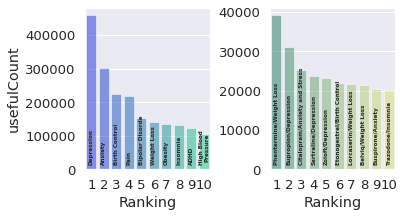

In [15]:
# conditions top 10:
cols = ['condition', 'usefulCount']

df_useful = data[cols].groupby(by=["condition"]).sum().sort_values(by='usefulCount', ascending = False).reset_index().head(10)


usefulCount = df_useful['usefulCount']
conditions = df_useful['condition']
conditions[9] = 'High Blood\nPressure' # just that it is two lines
print(list(conditions))
print(list(usefulCount))


fig, ax = plt.subplots(1,2)

title = 'Top 10 medical conditions with most useful reviews'
xlabel = 'Ranking'
ylabel = 'usefulCount'
xs = [c for c in range(1,usefulCount.shape[0]+1)]
plot = bar_plot(ax[0], xs, usefulCount, 'winter', title, ylabel, xlabel)
autolabel(plot, conditions)


# medications top 10:
cols = ['condition', 'drugName', 'usefulCount']

df_useful_meds = data[cols].groupby(by=["drugName", "condition"]).sum().sort_values(by='usefulCount', ascending = False).reset_index().head(10)

df_useful_meds

usefulCount2 = df_useful_meds['usefulCount']
conditions = df_useful_meds['condition']
drugNames = df_useful_meds['drugName']

labels = [drugNames[i] + '/' + conditions[i] for i in range(10)]
print(list(labels))
print(list(usefulCount2))

title = 'Top 10 medical drugs with most useful reviews'
xlabel = 'Ranking'
ylabel = ''
xs = [c for c in range(1,usefulCount.shape[0]+1)]
plot = bar_plot(ax[1], xs, usefulCount2, 'summer', title, ylabel, xlabel)
autolabel(plot, labels)

plt.savefig('figure1_1.pdf',bbox_inches='tight')
plt.show()

### Most common words in “useful reviews” - top 1000 user reviews ordered by 'usefulCount'

In [7]:
import nltk 

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/dejana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
# Note: Here we exclude the common words because they are not relevant

from nltk.corpus import stopwords
s=set(stopwords.words('english'))
s.add("i'm")
s.add('like')
s.add("I've")
s.add('mg')
# s.add
print('Excluding the words:', s)
print('*****************************************')
txt="a long string of text about him and her, where they do not cooperate"
print(*filter(lambda w: not w in s,txt.split()))

Excluding the words: {'because', 'hadn', 'own', 'like', "wasn't", 'the', 'doesn', "you've", 'off', 'or', 'herself', 'did', 'yours', 't', 'these', "don't", 'itself', 'theirs', 'shan', "aren't", 'me', "wouldn't", 'when', 'a', "she's", 'here', 'd', 'y', "hadn't", 'mightn', 'needn', 'once', 'why', 'those', 'under', 've', 'hasn', 'with', 'is', "hasn't", 'if', 'more', 'over', "should've", 'have', 'but', "isn't", "won't", 'after', 'she', "mightn't", 'weren', 'no', 'again', 'you', 'other', 'both', 'they', 'yourself', 'such', 'then', "that'll", "i'm", 'it', 'just', 'ours', 'below', "couldn't", 'before', 'shouldn', 'by', 'him', 'll', 'further', 'who', 'an', 'are', 'out', 'as', 'will', 'until', "you'd", 'where', 'from', 'ourselves', 's', 'our', 'was', 'himself', "doesn't", 'her', "mustn't", "shan't", 'do', 'wasn', 'mg', 'too', 'same', 'while', 'o', 'doing', 'each', 'them', 'm', "shouldn't", 'there', 'were', 'been', 'myself', 'be', 'we', 'and', 'for', "weren't", 'against', 're', 'their', 'so', 'co

In [9]:
# Functions to be used
import re

# remove bad things form the reviews (to have only words)
def filter_the_review(review):
    # remove ""
    review = re.sub('\"', '', review)
    
    # replace &#39; -> this is equivlaent to '
    review = re.sub('&#039;', '\'', review)
    
    # remove .,; &quot
    review = re.sub('[.,;]', '', review)
    review = re.sub('&quot', '', review)
    
    # change to small letters
    review = review.lower()
    
    # remove numbers
    review = re.sub('[0-9]+','', review)
    
    # replace two spaces with one (if they exist somewhere)
    review = re.sub('  ', ' ', review)
    
    # remove the stopwords
    filtered = filter(lambda w: not w in s,review.split())
    
    return list(filtered)


# count the words in a string
def word_count(words):
    counts = dict()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

# sum up the two dicts
def sum_dicts(dict1, dict2):
    res = {k: dict1.get(k, 0) + dict2.get(k, 0) for k in set(dict1) | set(dict2)}
    return res


In [10]:
# Fetching the data:
df_reviews = data.sort_values(by=['usefulCount'], ascending=False).review.head(1000)

# Testing the filter:
review = df_reviews.iloc[0]
print(review)
print('*************************************')
review = filter_the_review(review)
print(review)
print('______________________________________')

# Testing the counting:
cnt1 = word_count(review)
print(cnt1)
print('______________________________________')

# Testing the sum:
review2 = df_reviews.iloc[2]
review2 = filter_the_review(review2)
cnt2 = word_count(review2)
print(cnt2)
print('**************************************')
print(sum_dicts(cnt1,cnt2))


"I remember reading people&#039;s opinions, online, of the drug before I took it and it scared me away from it. Then I finally decided to give it a try and it has been the best choice I have made. I have been on it for over 4 months and I feel great. I&#039;m on 100mg and I don&#039;t have any side effects. When I first started I did notice that my hands would tremble but then it subsided. So honestly, don&#039;t listen to all the negativity because what doesn&#039;t work for some works amazing for others. So go based on youself and not everyone else. It may be a blessing in diguise. The pill is not meant to make you be all happy go lucky and see &quot;butterflies and roses&quot;, its meant to help put the chemicals in your mind in balance so you can just be who you are and not overly depressed. I still get sad some times, but that is normal, that is life, and it&#039;s up to people to take control to make a change. I did so by getting on this pill."
***********************************

In [11]:
# count for 1000 top reviews

cnt = {}

for review in df_reviews:
    review = filter_the_review(review)
    cnt1 = word_count(review)
    cnt = sum_dicts(cnt1, cnt)
    
# print top 10 words
top25 = sorted(cnt, key=cnt.get, reverse=True)[:25]
    

In [12]:
print(top25)

['feel', 'anxiety', 'life', 'years', 'side', 'taking', 'effects', 'take', 'day', 'pain', 'depression', "i've", 'time', 'started', 'get', 'would', 'first', 'medication', 'medicine', 'months', 'doctor', 'back', 'better', 'weeks', 'much']


In [13]:
plt.rcParams['axes.labelsize']

14.399999999999999